In [2]:
import numpy as np
import h5py as h5
import seaborn as sns
from collections import Counter
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
!head data/hg38/lisa_meta.xls

id	species	factor	factor_type	cell_line	cell_type	tissue	qc
1	Homo sapiens	BTAF1	tf	HeLa	Epithelium	Cervix	0
2	Homo sapiens	GAPDH	not sure	HeLa	Epithelium	Cervix	0
4	Homo sapiens	EGR1	tf	K562	Erythroblast	Bone Marrow	0
6	Homo sapiens	TCF4	tf	LS174T	Epithelium	Colon	0
8	Homo sapiens	TCF4	tf	LS174T	Epithelium	Colon	0
9	Homo sapiens	TCF4	tf	LS174T	Epithelium	Colon	0
11	Homo sapiens	TCF4	tf	LS174T	Epithelium	Colon	0
12	Homo sapiens	TCF4	tf	LS174T	Epithelium	Colon	0
17	Homo sapiens	TERF1	predicted chromatin regulator	BJ	Fibroblast	Skin	0


In [50]:
!cat data/hg38/lisa_meta.xls | grep "Homo sapiens" | wc -l

11198


In [227]:
cistrome_txt = pd.read_csv('data/hg38/cistrome.txt', sep = '\t')

In [228]:
cistrome_txt

,id,edition,source,sourcefile,status,numseqs,pmid,dbd,family,description,...,comment3,comment4,comment5,datasetid,zscore,seqfactors,seqdbds,seqdatasetid,nmotifs,pssm
0,M00041,NaN,Transfac,NaN,4,NaN,8190638,Leucine zipper Family,NaN,activating transcription factor 2|jun proto-on...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.010, 0.023, 0.010, 0.957], [0.047, 0.010,..."
1,M00062,NaN,Transfac,NaN,4,NaN,7687740,Interferon Regulatory Factor,NaN,interferon regulatory factor 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.010, 0.381, 0.571, 0.038], [0.970, 0.010,..."
2,M00072,NaN,Transfac,NaN,4,NaN,2233727,CP2 Transcription Factor Domain Family,NaN,transcription factor CP2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.010, 0.167, 0.813, 0.010], [0.010, 0.813,..."
3,M00082,NaN,Transfac,NaN,4,NaN,8321231,Runt Domain Family,NaN,runt-related transcription factor 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.737, 0.010, 0.053, 0.200], [0.053, 0.010,..."
4,M00085,NaN,Transfac,NaN,4,NaN,7958847,BetaBetaAlpha-zinc finger Family,NaN,zinc finger and BTB domain containing 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.086, 0.343, 0.257, 0.314], [0.057, 0.143,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,UP00404,NaN,UniPROBE,NaN,9,NaN,19443739,Ets Domain Family,NaN,E74-like factor 2 (ets domain transcription fa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.382, 0.199, 0.201, 0.218], [0.092, 0.332,..."
1057,UP00412,NaN,UniPROBE,NaN,9,NaN,19443739,Ets Domain Family,NaN,ets variant gene 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.164, 0.479, 0.235, 0.122], [0.298, 0.128,..."
1058,UP00413,NaN,UniPROBE,NaN,9,NaN,19443739,Ets Domain Family,NaN,E74-like factor 4 (ets domain transcription fa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.350, 0.139, 0.209, 0.302], [0.080, 0.359,..."
1059,UP00418,NaN,UniPROBE,NaN,9,NaN,19443739,Ets Domain Family,NaN,ets variant gene 6 (TEL oncogene),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[0.355, 0.069, 0.299, 0.277], [0.210, 0.408,..."


In [54]:
cistrome_txt.columns

Index(['id', 'edition', 'source', 'sourcefile', 'status', 'numseqs', 'pmid',
       'dbd', 'family', 'description', 'species', 'cellline', 'entrez',
       'symbol', 'synonym', 'refseq', 'cluster', 'comment2', 'comment2.1',
       'comment3', 'comment4', 'comment5', 'datasetid', 'zscore', 'seqfactors',
       'seqdbds', 'seqdatasetid', 'nmotifs', 'pssm'],
      dtype='object')

# Read in DNase Data

In [4]:
dnnase_data = h5.File('data/hg38/hg38_window1kb_DNase.h5', 'r')

In [5]:
test_dnaase_data = dnnase_data["OrderCount"][:, :10]

In [6]:
test_dnaase_data.shape

(3209513, 10)

# Read in ChIP data

In [ ]:
chip = h5.File('data/hg38/hs_tf_new_peak_loct.h5', 'r')

In [96]:
%%timeit
chip_ds = []
for dataset in list(chip.keys())[:8500]:
    chip_ds.append(chip[dataset][...].astype(np.int32))

datasets = np.concatenate([np.full((chip.shape[0], ), i) for i, chip in enumerate(chip_ds)])

peaks = np.concatenate(chip_ds)

6.52 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
num_peaks = peaks.shape
num_bins = test_dnaase_data.shape[0]

chip_sparse = sparse.coo_matrix(
    (
        np.ones(num_peaks), 
        (peaks // 10, datasets)
    ), 
    shape = (num_bins, len(chip_ds)))

In [24]:
test_dnaase_data.shape, chip_sparse.shape

((3209513, 10), (3209513, 8472))

In [28]:
test_dnaase_data[:, 0][:, np.newaxis].shape

(3209513, 1)

In [32]:
%%timeit
chip_sparse.multiply(test_dnaase_data[:, 0][:, np.newaxis]) #Okay that works and is super fast

13.9 s ± 1.94 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
chip_overlaps = _

In [31]:
chip_overlaps.shape

(3209513, 8472)

In [33]:
converter = np.load('data/hg38/hg38_100to1000window.out.npy')

In [34]:
converter.shape

(32093082,)

In [35]:
converter

array([      0,       0,       0, ..., 3209512, 3209512, 3209512])

In [38]:
peaks.max()

30882611

In [74]:
converter[peaks].max()

3088271

In [71]:
for chip_key in list(chip.keys()):
    try:
        int(chip_key)
    except Exception:
        print(chip_key)

IDs


In [73]:
chip['IDs'][...]

array([b'1', b'2', b'4', ..., b'77535', b'77536', b'77537'], dtype='|S25')

In [76]:
cistrome_txt.index.max()

1060

In [2]:
lisa_meta = pd.read_csv('data/hg38/lisa_meta.xls', sep = '\t', encoding='iso-8859-1')

In [89]:
lisa_meta[lisa_meta.species == 'Homo sapiens'].factor.nunique()

1319

In [92]:
tad_info = pd.read_csv('data/hg38/hg38_promoter_TADann_H3K4me3_enhance_k27me3_Using.xls', sep = '\t')

In [94]:
tad_info.columns

Index(['chrom', 'pstart', 'pend', 'geneID', 'geneName', 'strand', 'TADchrom',
       'TADstart', 'TADend', 'TADid', 'median_zk4me3_enhance',
       'median_TADk27ac', 'k4me3_cluster', 'tad_cluster',
       'k4me3_order_cluster', 'tad_order_cluster', 'median_zk27me3_enhance',
       'k27me3_cluster', 'k27me3_order_cluster', 'quadrant'],
      dtype='object')

In [110]:
gene_id.shape, gene_symbol.shape, tad_group.shape

((19866,), (19866,), (19866,))

In [118]:
num_genes = gene_id.shape

In [320]:
lisa_v2_hg38 = h5.File('./data/hg38/lisa_v2_hg38.h5', 'a')

In [321]:
lisa_v2_hg38.create_group('gene_info')

<HDF5 group "/gene_info" (0 members)>

In [323]:
lisa_v2_hg38.keys()

gene_symbol.values

gene_symbols = lisa_v2_hg38.create_dataset('/gene_info/gene_symbols', data = gene_symbol.values.astype('S'))

lisa_v2_hg38.create_dataset('/gene_info/gene_refseqIDs', data = gene_id.values.astype('S'))

lisa_v2_hg38.create_dataset('/gene_info/gene_tad_info', data = tad_group.values.astype('S'))

lisa_v2_hg38['gene_info']['gene_tad_info']

lisa_v2_hg38.close()

# Testing Model Training
<hr>

In [ ]:
#LOADING IN DATA TO MY H5
rp_h5 = h5.File('data/hg38/margeRP_DNase.h5', 'r')

rp_h5.keys()

rp_h5['RP'][10,:]

lisa_v2_hg38 = h5.File('data/hg38/lisa_v2_hg38.h5', 'w')

dnase_group = lisa_v2_hg38.create_group('DNase_data')

old_refseq = rp_h5['RefSeq'][...].astype(str)

old_refseq = [
    stuff.split(':')[4] for stuff in old_refseq
]

old_refseq

lisa_v2_hg38.create_dataset('DNase_data/gene_ids', data = rp_h5['RefSeq'][...].astype('S'))

lisa_v2_hg38.create_dataset('DNase_data/sample_ids', data = rp_h5['IDs'][...].astype('S'))

lisa_v2_hg38.create_dataset('DNase_data/regulatory_potential', data = rp_h5['RP'][...])

lisa_v2_hg38.keys()

lisa_v2_hg38.close()

In [266]:
lisa_v2_hg38 = h5.File('data/hg38/lisa_v2_hg38.h5', 'r')

In [325]:
lisa_v2_hg38.keys()

<KeysViewHDF5 ['DNase_data', 'gene_info']>

In [327]:
lisa_v2_hg38['DNase_data'].keys()

<KeysViewHDF5 ['gene_ids', 'regulatory_potential', 'sample_ids']>

In [341]:
available_genes = [x.split(':')[-2] for x in lisa_v2_hg38['DNase_data']['gene_ids'][...].astype(str)]

In [337]:
extract_genes = np.isin(available_genes, selected_genes)

# Setting up RP data pt 2

In [4]:
data = h5.File('data/hg38/lisa_v2_hg38.h5', 'r')

In [8]:
data['DNase_data'].keys()

<KeysViewHDF5 ['gene_ids', 'regulatory_potential', 'sample_ids']>

In [17]:
gene_ids = data['DNase_data']['gene_ids'][...]

In [20]:
symbols = [line.decode('utf-8').split(':')[-1] for line in gene_ids]

len(symbols), len(set(symbols))

symbol_dict = {}
for i, symbol in enumerate(symbols):
    if not symbol in symbol_dict:
        symbol_dict[symbol] = i

first_occurence = np.zeros(len(gene_ids), dtype = np.bool)
first_occurence[list(symbol_dict.values())] = True

first_occurence.sum()

In [36]:
len(set(selected_genes).intersection(set(np.array(symbols)[first_occurence])))

2981

In [35]:
np.array(symbols)[first_occurence]

array(['DDX11L1', 'MIR6859-3', 'MIR6859-4', ..., 'CSPG4P1Y', 'GOLGA2P2Y',
       'GOLGA2P3Y'], dtype='<U22')

In [39]:
subset_rp_data = data['DNase_data']['regulatory_potential'][first_occurence, :][...]

In [40]:
subset_rp_data.shape

(26631, 1110)

In [41]:
subest_gene_ids = np.array(symbols)[first_occurence]

In [43]:
subest_gene_ids.shape

(26631,)

In [44]:
data.close()

In [99]:
with h5.File('data/hg38/lisa_v2_hg38.h5', 'r+') as data:
    del data['DNase_data']['regulatory_potential']
    #del data['DNase_data']['gene_ids']
    del data['DNase_data']['sample_ids']
    data.create_dataset('DNase_data/regulatory_potential', data = subset_rp_data)
    #data.create_dataset('DNase_data/gene_ids', data = np.array(subest_gene_ids).astype('S'))
    data.create_dataset('DNase_data/sample_ids', data = np.array(dnaase_ids).astype(np.int32))

In [102]:
data = h5.File('data/hg38/lisa_v2_hg38.h5', 'r+')

In [58]:
dnaase_ids = data['DNase_data']['sample_ids'][...].astype(int)

In [79]:
qc_map = lisa_meta[lisa_meta.id.isin(dnaase_ids)].set_index('id').qc.reindex(dnaase_ids)

In [85]:
subset_qc = qc_map.values.astype(np.bool)

In [87]:
subset_rp_data.shape

(26631, 1110)

In [88]:
subset_gene_ids = subest_gene_ids

In [91]:
dnaase_ids = dnaase_ids[subset_qc]

In [93]:
dnaase_ids.shape

(934,)

In [95]:
subset_rp_data = subset_rp_data[:, subset_qc]

# Testing LR functions

In [258]:
import json

In [265]:
print(json.dumps(selection_model.get_info(), indent = 4))

{
    "search_params": {
        "epsilon": 1e-07,
        "max_iters": 50,
        "num_datasets_selected": 10,
        "penalty": "l1",
        "penalty_range": [
            -1,
            10
        ],
        "tol": 0.01
    },
    "search_model_params": {
        "C": 0.03482458570612164,
        "class_weight": null,
        "dual": false,
        "fit_intercept": true,
        "intercept_scaling": 1,
        "l1_ratio": null,
        "max_iter": 100,
        "multi_class": "auto",
        "n_jobs": null,
        "penalty": "l1",
        "random_state": null,
        "solver": "liblinear",
        "tol": 0.01,
        "verbose": 0,
        "warm_start": false
    },
    "dataset_coefs": [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.02227953496

# ChIP-seq data integration

In [4]:
chip_data = h5.File('./data/hg38/hs_tf_new_peak_loct.h5')

/home/alynch/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [5]:
chip_data.keys()

<KeysViewHDF5 ['1', '1006', '1009', '1010', '1011', '1012', '1013', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '11', '1140', '1141', '1143', '1144', '1168', '1172', '1173', '1174', '1175', '1176', '1177', '1178', '1194', '1195', '1196', '1197', '1198', '1203', '1208', '1212', '1213', '1214', '1215', '1218', '1219', '1220', '1221', '1222', '1223', '1224', '1225', '1226', '1227', '1228', '1229', '1230', '1298', '1299', '1300', '1301', '1302', '1303', '1304', '1305', '1306', '1307', '1308', '1309', '1312', '1313', '1314', '1329', '1330', '1331', '1332', '1333', '1334', '1335', '1336', '1337', '1338', '1339', '1340', '1344', '1345', '1346', '1347', '1348', '1349', '1350', '1351', '1352', '1354', '1356', '1357', '1358', '1359', '1360', '1361', '1362', '1367', '1368', '1374', '1375', '1380', '1381', '1382', '1383', '1447', '1448', '1449', '1452', '1463', '1464', '1470', '1471', '1492', '1493', '1507', '1508', '1628', '1629', '17', '1740', '1741', '1742', 

In [7]:
chip_data["IDs"][...]

array([b'1', b'2', b'4', ..., b'77535', b'77536', b'77537'], dtype='|S25')

In [12]:
example_chip = chip_data['1'][...]

In [15]:
window_converter = np.load('data/hg38/hg38_100to1000window.out.npy')

In [17]:
example_chip.map(window_converter)

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [19]:
example_chip_1000kb = window_converter[example_chip]

In [21]:
lisa_meta = lisa_meta.set_index('id')

In [22]:
lisa_meta

,species,factor,factor_type,cell_line,cell_type,tissue,qc
id,,,,,,,
1,Homo sapiens,BTAF1,tf,HeLa,Epithelium,Cervix,0
2,Homo sapiens,GAPDH,not sure,HeLa,Epithelium,Cervix,0
4,Homo sapiens,EGR1,tf,K562,Erythroblast,Bone Marrow,0
6,Homo sapiens,TCF4,tf,LS174T,Epithelium,Colon,0
8,Homo sapiens,TCF4,tf,LS174T,Epithelium,Colon,0
...,...,...,...,...,...,...,...
57269,Mus musculus,YY1,tf,C2C12,Myoblast,Muscle,1
57271,Mus musculus,YY1,tf,C2C12,Myoblast,Muscle,1
57973,Mus musculus,TET3,cr,J1,Embryonic Stem Cell,Embryo,1


In [28]:
lisa_meta.loc[1]

species        Homo sapiens
factor                BTAF1
factor_type              tf
cell_line              HeLa
cell_type        Epithelium
tissue               Cervix
qc                        0
Name: 1, dtype: object

In [29]:
from collections import defaultdict

In [34]:
lisa_meta.index = lisa_meta.index.astype(np.str)

In [61]:
tf_chip_dict = defaultdict(set)

num_samples = len(list(chip_data.keys()))
for i, sample in enumerate(chip_data.keys()):
    print('\rSample {}/{}'.format(str(i + 1), str(num_samples)), end = '')
    if not sample == 'IDs':
        metadata = lisa_meta.loc[sample]
        if metadata.qc == 1:
            chip_sample = chip_data[sample][...]
            chip_sample_1000kb = window_converter[chip_sample]
            tf_chip_dict[metadata.factor] |= set(list(chip_sample_1000kb))

Sample 8472/8472

In [46]:
lisa_data = h5.File('./data/hg38/lisa_v2_hg38.h5', 'r+')

In [48]:
chip_group = lisa_data.create_group('ChIP_data')

In [55]:
chip_group.keys()

<KeysViewHDF5 ['AEBP2', 'AFF1', 'AFF4', 'AHR', 'AR', 'ARNT', 'ATF3', 'ATF7IP', 'BCL6', 'BCOR', 'BMI1', 'BRD2', 'BRD3', 'BRD4', 'BRD7', 'BRDU', 'BRF1', 'C17orf49', 'CAMTA2', 'CBFB', 'CBX1', 'CBX5', 'CCDC101', 'CDK8', 'CDK9', 'CDX2', 'CEBPA', 'CEBPB', 'CHD1', 'CHRM2', 'CLOCK', 'CREB1', 'CREB3L4', 'CREBBP', 'CREM', 'CTBP1', 'CTCF', 'DCP1A', 'DDX5', 'DLX1', 'DNMT3A', 'E2F1', 'E2F3', 'E2F4', 'E2F7', 'EBNA1BP2', 'EBNA3', 'EGR1', 'EGR2', 'EHF', 'ELF1', 'ELF2', 'ELF5', 'ELK1', 'ELK4', 'ELL2', 'EOMES', 'ERG', 'ESR1', 'ETS1', 'ETS2', 'ETV5', 'ETV7', 'EZH2', 'FAIRE', 'FLI1', 'FOS', 'FOXA1', 'FOXA2', 'FOXD2', 'FOXH1', 'FOXM1', 'FOXP1', 'GATA1', 'GATA2', 'GATA3', 'GATA4', 'GATA6', 'GATAD1', 'GLI2', 'GLIS1', 'GLYR1', 'GMEB2', 'GREB1', 'GRHL2', 'GRHL3', 'GTF2B', 'GTF3C1', 'HBP1', 'HDAC1', 'HES1', 'HINFP', 'HIRA', 'HNF4A', 'HOTAIR', 'HOXA13', 'HOXB13', 'HSF1', 'IRF2', 'IRF5', 'JUN', 'JUND', 'KDM1A', 'KLF10', 'KLF3', 'KLF4', 'KMT2A', 'LHX2', 'LMNA', 'LMNB1', 'LMO2', 'LYL1', 'MAX', 'MECP2', 'MED1', 'MED

In [67]:
for factor, peaks in tf_chip_dict.items():
    try:
        if factor in chip_group.keys():
            del chip_group[factor]
        chip_group.create_dataset(factor, data = np.array(list(peaks)).astype('i'))
    except OSError:
        print(factor)
        pass

SMAD2/3


In [70]:
lisa_data.close()

# Model Testing

In [30]:
import models
import build_chromatin_model
import background_genes_selection
from models import LR_BinarySearch_SampleSelectionModel
from models import LR_ChromatinModel
from sklearn.model_selection import ParameterGrid
import insilico_deletion_model as ISD

#load gene lists
with h5.File('data/hg38/lisa_v2_hg38.h5', 'r') as store:
    gene_symbols = store['gene_info']['gene_symbols'][...].astype(str)
    gene_ids = store['gene_info']['gene_refseqIDs'][...].astype(str)
    gene_tag_groups = store['gene_info']['gene_tad_info'][...].astype(str)

#open user-supplied gene-list
with open('data/gene_list.txt', 'r') as f:
    user_gene_list = f.readlines()

gene_list = [gene.strip().upper() for gene in user_gene_list]

#select background genes from TAD distributions
selected_genes, labels = background_genes_selection\
.select_genes_for_chromatin_model(gene_list, gene_symbols, gene_ids, gene_tag_groups, 
                                  num_selected = 3000, user_background_genes = None, method = 'TAD')

#Load gene x dataset RP matrix
with h5.File('data/hg38/lisa_v2_hg38.h5', 'r') as data:
    
    gene_symbols = data['DNase_data']['gene_ids'][...].astype(str)
    intersected_genes = set(selected_genes).intersection(set(gene_symbols))
    intersected_ids = np.isin(gene_symbols, list(intersected_genes))
    
    rp_matrix = data['DNase_data']['regulatory_potential'][intersected_ids, :][...]
    dataset_ids = data['DNase_data']['sample_ids'][...].astype(str)

labels = labels[np.isin(selected_genes, list(intersected_genes))]

#instantiate models
sample_selection_model = LR_BinarySearch_SampleSelectionModel()

chromatin_model = LR_ChromatinModel({'C' : list(10.0**np.arange(-4,4,1))})

#train models
selected_datasets, selected_dataset_ids, selection_model, chromatin_model, normalization_fn\
    = build_chromatin_model.build_chromatin_model(rp_matrix, dataset_ids, 
                                            labels, sample_selection_model, chromatin_model, n_jobs = -1)

#read in chipseq data and build sparse matrix
with h5.File('data/hg38/lisa_v2_hg38.h5', 'r') as data:

    tf_ids = {tf : i for i, tf in enumerate(data['ChIP_data'].keys())}

    peaks = np.concatenate([
        data['ChIP_data'][factor][...].astype(np.int32)
        for factor in tf_ids.keys()
    ])

    data['ChIP_data']['SMAD4'].shape

    tf_index = np.concatenate([
        np.full(data['ChIP_data'][factor].shape, factor_id)
        for factor, factor_id in tf_ids.items()    ])

#read in DNase samples, filter by important to ChIP model
with h5.File('data/hg38/lisa_v2_hg38.h5', 'r') as data:
    
    num_peaks = peaks.shape
    num_bins = data['DNase_data']['reads_data'][selected_dataset_ids[0]].shape[0]

    chip_sparse = sparse.coo_matrix(
        (
            np.ones(num_peaks), 
            (peaks, tf_index)
        ), 
        shape = (num_bins, len(tf_ids))
    )

    chip_filter = np.array(chip_sparse.sum(axis = 1) >= 1).reshape(-1)

    chip_sparse = sparse.csr_matrix(chip_sparse)[np.array(chip_filter).reshape(-1), :]

    dnnase_reads = np.concatenate([
        data['DNase_data']['reads_data'][dataset_id][chip_filter][...].reshape((-1,1))
        for dataset_id in selected_dataset_ids
    ], axis = 1)

#Import RP matrix
rp_shape = (dnnase_reads.shape[0], labels.shape[0])
num_datapoints = 1e5

random_gene = np.random.choice(rp_shape[1], int(num_datapoints))
random_bin = np.random.choice(rp_shape[0], int(num_datapoints))

rp_matrix = sparse.coo_matrix(
    (
        np.ones(int(num_datapoints)),
        (random_bin, random_gene)
    ),
    shape = rp_shape
)

ISD.get_insilico_deletion_significance(datasets = dnnase_reads, ChIP_per_bin=chip_sparse, 
                rp_matrix= rp_matrix, chromatin_model = chromatin_model, labels = labels)

#

/project/dev/alynch/conda_envs/lisa_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/project/dev/alynch/conda_envs/lisa_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/project/dev/alynch/conda_envs/lisa_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/project/dev/alynch/conda_envs/lisa_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/project/dev/alynch/conda_envs/lisa_env/lib/python3.6/site-packages/sklearn/svm/

# Reformat DNase Reads

In [123]:
data = h5.File('data/hg38/lisa_v2_hg38.h5', 'r+')

In [126]:
data['gene_info'].keys()

<KeysViewHDF5 ['gene_refseqIDs', 'gene_symbols', 'gene_tad_info']>

In [3]:
dnase_folder = data['DNase_data']

dnase_reads_folder = dnase_folder.create_group('reads_data')

old_data = h5.File('data/hg38/hg38_window1kb_DNase.h5', 'r')

for i, dataset_id in enumerate(old_data['IDs'][...].astype(str)):
        print('\rSample {}'.format(str(i+1)), end = '')
        dnase_reads_folder.create_dataset(
            dataset_id,
            data = old_data['OrderCount'][:, i][...]                                             
        )

list(data['DNase_data']['reads_data'].keys())[0]

run_1798 = data['DNase_data']['reads_data']['1798'][...]

np.where(old_data['IDs'][...].astype(str) == '1798')

old_data['IDs'][...][28]

old_1798 = old_data['OrderCount'][:1000, 28]

run_1798_test = run_1798[:1000]

np.isclose(run_1798_test, old_1798, 1e-7).all()

old_data.close()

data.close()

# Config testing

# Old RP Mapping

In [6]:
def calc_RP_submatrix(bin_position, bin_index, tss_position, tss_index, L):

    distance_matrix = np.abs(bin_position[:, np.newaxis] - tss_position[np.newaxis, :])

    nonzero_indices = np.argwhere(distance_matrix <= L)

    bin_index, tss_index = bin_index[nonzero_indices[:,0]], tss_index[nonzero_indices[:,1]]

    nonzero_distances = distance_matrix[nonzero_indices[:,0], nonzero_indices[:,1]]

    return bin_index, tss_index, nonzero_distances

def build_rp_map(gene_symbols, gene_tss, bins, L, delta):
    
    grouped_bins = bins.groupby('chr')
    grouped_tss = gene_tss.groupby('chr')

    chrs = set(grouped_bins.groups.keys()).intersection(set(grouped_tss.groups.keys()))

    loadingbar = LoadingBar('Computing RP map', len(chrs), 20, cold_start = True)

    print('\r', loadingbar, end = '')

    bin_indices, tss_indices, distances = [],[],[]
    for chrom in chrs:

        chr_bins = grouped_bins.get_group(chrom)
        chr_tss = grouped_tss.get_group(chrom)

        bin_index, tss_index, distance = calc_RP_submatrix(chr_bins.center.values, chr_bins.index,
                                                chr_tss.tss.values, chr_tss.index, 100000)
        bin_indices.append(bin_index)
        tss_indices.append(tss_index)
        distances.append(distance)

        print('\r', loadingbar, end = '')

    bin_indices, tss_indices, distances = np.concatenate(bin_indices), np.concatenate(tss_indices), np.concatenate(distances)
    
    #calculate RP
    mu = (- L / delta) * np.log(1/3)
    
    distances = mu * (distances / L)
    
    RP = (2 * np.exp(-distances)) / (1 + np.exp(-distances))
    
    subset_tss = gene_tss[np.isin(gene_tss.symbol, gene_symbols)].drop_duplicates(subset = 'symbol', keep = 'first')
    allowed_tss = subset_tss.index

    rp_map = sparse.csc_matrix(
        (RP, 
        (bin_indices, tss_indices)),
        shape = (len(bins), len(gene_tss))
    )

    rp_map = rp_map[:, allowed_tss]
    rp_map_symbols = gene_tss.loc[allowed_tss].symbol.values
    rp_map = rp_map.tocoo()
    
    return rp_map, rp_map_symbols

In [28]:
from utils import LoadingBar, ragged_array_to_sparse_matrix
from collections import defaultdict
import h5py as h5
import pandas as pd
import numpy as np
from scipy import sparse
import configparser

def subset_accessibility_rp_data(path_to_h5, gene_set, qc_status):
    
    with h5.File(path_to_h5, 'r') as acc_data:
        
        symbols = acc_data['RefSeq'][...].astype(str)

        gene_subset = np.isin(symbols, gene_set)
        
        dataset_ids = acc_data['IDs'][...].astype(str)
        
        qc_subset = qc_status[dataset_ids].values.astype(np.bool)
        
        rp_data = acc_data['RP'][:, qc_subset][gene_subset, :]
        
    return rp_data, np.array(symbols)[gene_subset], dataset_ids[qc_subset]

def reformat_accessibility_assay_RP(h5_object, technology, config, path_to_h5, gene_set, qc_status):

    rp_data, genes, sid = subset_accessibility_rp_data(path_to_h5, gene_set, qc_status)
    
    h5_object.create_dataset(
        config['accessibility_assay']['reg_potential_gene_symbols'].format(technology = technology),
        data = np.array(genes).astype('S')
    )
    
    h5_object.create_dataset(
        config['accessibility_assay']['reg_potential_dataset_ids'].format(technology = technology),
        data = np.array(sid).astype('S')
    )
    
    h5_object.create_dataset(
        config['accessibility_assay']['reg_potential_matrix'].format(technology = technology),
        data = rp_data
    )

    
def reformat_TF_hits(config, technology, path_to_h5, window_converter, metadata, offset = 0):
    
    with h5.File(path_to_h5, 'r') as tf_hits:

        num_samples = len(list(tf_hits.keys()))
        
        loading_bar = LoadingBar('\tCollecting binding data', num_samples, 20)
        
        peak_list, values, dataset_ids = [],[],[]
        
        for sample in tf_hits.keys():
            print('\r',loading_bar, end = '')
            
            if not sample == 'IDs':
                
                try:
                    sample_metadata = metadata.loc[str(sample)]
                
                    if sample_metadata.qc == 1:
                        
                        factor_name = sample_metadata.factor.replace('/', '-').replace('_','-')

                        peaks = tf_hits[sample][...]
                        peaks = window_converter[peaks - offset]
                        
                        peak_list.append(peaks)
                        values.append(np.ones(len(peaks)))
                        dataset_ids.append(sample)
                        
                except OSError:
                    print('\n\tError saving data for sample {}, factor: {}'\
                          .format(str(sample), sample_metadata.factor))
                except KeyError:
                    print('\n\tError: No metadata for sample {}'.format(str(sample)))
                    
    return ragged_array_to_sparse_matrix(peak_list, values, int(config.get('lisa_params','num_bins'))), dataset_ids
                    

def index_binned_reads(h5_object, technology, config, path_to_h5, qc_status):
    
    print('\tReading binned reads data ...')

    with h5.File(path_to_h5, 'r') as binned_reads:

        dataset_ids = binned_reads['IDs'][...].astype(str)

        dataset_subset = qc_status[dataset_ids].astype(np.bool).values

        reads_matrix = binned_reads['OrderCount'][:, dataset_subset]

    loading_bar = LoadingBar('\tWriting ID-indexed data', dataset_subset.sum(), 20)
    
    reads_matrix = reads_matrix * int(config.get('lisa_params','bin_length'))

    for i, dataset_id in enumerate(dataset_ids[dataset_subset]):
        print('\r', loading_bar, end = '')
        h5_object.create_dataset(
            config['accessibility_assay']['binned_reads'].format(technology = technology, dataset_id = dataset_id),
            data = reads_matrix[:, i]
        )

In [29]:
def convert_lisa_data_formatting(species, *, create_new = True,
    masterlist,
    metadata_file,
    tad_data,
    window_conversion_file,
    dnase_reads,
    acetylation_reads,
    chip_peaks,
    motif_peaks,
    chip_rp, 
    dnase_rp,
    acetylation_rp,
    config_file,
    motif_metadata,
    tss_data,
    genomic_windows,
    rp_L, rp_delta
            ): 
    config = configparser.ConfigParser()
    config.read(config_file)

    print('Reading metadata ...')

    tad_data = pd.read_csv(tad_data, encoding = "ISO-8859-1", sep = '\t')

    with h5.File(dnase_rp, 'r') as dnase_rp_data:
        #dnase_gene_symbols = [line.split(":")[-2:] for line in dnase_rp_data['RefSeq'][...].astype(str)]
        dnase_gene_symbols = dnase_rp_data['RefSeq'][...].astype(str)

    with h5.File(acetylation_rp, 'r') as acetylation_rp_data:
        #acetyalation_gene_symbols = [line.split(":")[-2:] for line in acetylation_rp_data['RefSeq'][...].astype(str)]
        acetyalation_gene_symbols = acetylation_rp_data['RefSeq'][...].astype(str)
    
    gene_tss = pd.read_csv(tss_data, sep = '\t', header = None)
    gene_tss['tss'] = gene_tss.iloc[:,1]
    gene_tss['gene_symbol'] = gene_tss.iloc[:, :4].agg(lambda x : ':'.join([str(y) for y in x]), axis =1)
    gene_tss = gene_tss.iloc[:, 5:]
    gene_tss.columns = ['chr','bin_start','bin_end','bin_num','tss','gene_symbol']
    gene_tss.bin_num -= 1

    bins = pd.read_csv(genomic_windows, sep ='\t', header = None)
    bins.columns = ['chr','start','end','binnum']
    bins['center'] = (bins.end - bins.start) // 2 + bins.start
    
    with open(masterlist, 'r') as f:
        masterlist, master_symbols = list(zip(*[(line.strip(), line.strip().split(':')[-1]) for line in f.readlines()]))
    
    masterlist = np.array(masterlist)
    
    print('Intersecting gene lists. Compiling gene TAD information ...')
    genename_mask = masterlist[np.isin(np.array(master_symbols), tad_data.geneName)]
    
    encountered_id, encountered_symbol = {},{}
    reachable_symbols = []
    for _id in masterlist:
        gene_id, gene_symbol = _id.split(':')[-2:]
        if not (gene_id in encountered_id and gene_symbol in encountered_symbol):
            reachable_symbols.append(_id)
            encountered_id[gene_id] = True
            encountered_symbol[gene_symbol] = True
            
    combined_symbols = set(reachable_symbols) & set(dnase_gene_symbols) & set(acetyalation_gene_symbols) \
        & set(gene_tss.gene_symbol)
    
    combined_symbols = list(combined_symbols)
    
    allowed_gene_names = set([symbol.split(':')[-1] for symbol in combined_symbols])
    
    print('Found {} common symbols'.format(str(len(combined_symbols))))
    
    tad_data = tad_data[tad_data.geneName.isin(allowed_gene_names)]

    tad_gene_names = tad_data.geneName.values
    tad_domain = (tad_data.k4me3_order_cluster.astype(str) + ',' + tad_data.tad_order_cluster.astype(str)).values

    metadata = pd.read_csv(metadata_file, sep = '\t', encoding = "ISO-8859-1").set_index('id')
    metadata.index = metadata.index.astype(np.str)

    window_converter = np.load(window_conversion_file)

    motif_metadata = pd.read_csv(motif_metadata, sep = '\t').set_index('id')
    motif_metadata['qc'] = 1
    motif_metadata['factor'] = motif_metadata.index
    
    with h5.File(config.get('paths','h5_path').format(species = species), 'w' if create_new else 'a') as data:
        
        data.create_dataset(config.get('tad_info','gene_names'), data = np.array(tad_gene_names).astype('S'))
        data.create_dataset(config.get('tad_info','tad_domains'), data = np.array(tad_domain).astype('S'))
        data.create_dataset(config.get('genes','master_gene_list'), data = np.array(combined_symbols).astype('S'))
        
        #____Reformat Motif hits____
        print('Motifs:')    
        sparse_motif, dataset_ids = reformat_TF_hits(config, 'motif_hits_1000kb', motif_peaks, window_converter, motif_metadata)
        
        sparse.save_npz(config.get('factor_binding', 'matrix').format(species = species, technology = 'motif_hits_1000kb'), sparse_motif)
        data.create_dataset(config.get('factor_binding', 'dataset_ids').format(technology = 'motif_hits_1000kb'),
                           data = np.array(dataset_ids).astype('S'))
        
        
        #_____Reformat ChIP-seq hits___
        print('Chip-seq:')
        sparse_chip, dataset_ids = reformat_TF_hits(config, 'ChIP-seq_1000kb', chip_peaks, window_converter, metadata, offset = 1)

        sparse.save_npz(config.get('factor_binding', 'matrix').format(species = species, technology = 'ChIP-seq_1000kb'), sparse_chip)
        data.create_dataset(config.get('factor_binding', 'dataset_ids').format(technology = 'ChIP-seq_1000kb'), 
                            data = np.array(dataset_ids).astype('S'))
        
        #____RP MAP______
        #rp_map, rp_map_symbols = build_rp_map(gene_symbols, gene_tss, bins, rp_L, rp_delta)
        
        #sparse.save_npz(config.get('RP_map','matrix').format(species = 'hg38'), rp_map)
        
        #data.create_dataset(config.get('RP_map','gene_symbols'), data = np.array(rp_map_symbols).astype('S'))
        
        #____ChIP-seq RP matrix_____
        print('\tReformatting ChIP-seq regulatory potential matrix ...')
        reformat_accessibility_assay_RP(data, 'ChIP-seq_RP', config, chip_rp, combined_symbols, metadata.qc)
        
        #____DNase RP and Reads____
        print('DNase:')
        print('\tReformatting DNase regulatory potential matrix ...')
        reformat_accessibility_assay_RP(data, 'DNase', config, dnase_rp, combined_symbols, 
                                       metadata.qc)

        index_binned_reads(data, 'DNase', config, dnase_reads, metadata.qc)
        
        #____acetylation PR and Reads____
        print('H3K27ac:')
        print('\tReformatting h3k27ac regulatory potential matrix ...')
        reformat_accessibility_assay_RP(data, 'H3K27ac', config, acetylation_rp,
                                       combined_symbols, metadata.qc)
        
        index_binned_reads(data, 'H3K27ac', config, acetylation_reads, metadata.qc)
        
        
        
    # do binned data next

In [32]:
convert_lisa_data_formatting('hg38', create_new = True,
    masterlist = './masterlist.txt',
    metadata_file = 'old_data/hg38/lisa_meta.xls',
    tad_data = 'old_data/hg38/hg38_promoter_TADann_H3K4me3_enhance_k27me3_Using.xls',
    window_conversion_file = 'old_data/hg38/hg38_100to1000window.out.npy',
    dnase_reads = 'old_data/hg38/hg38_window1kb_DNase.h5',
    acetylation_reads = 'old_data/hg38/hg38_window1kb_H3K27ac.h5',
    chip_peaks = 'old_data/hg38/hs_tf_new_peak_loct.h5',
    motif_peaks = 'old_data/hg38/marge2_motif_100bp_99.h5',
    chip_rp = './old_data/hg38/hs_tf_new_beta_rp.h5',
    dnase_rp = 'old_data/hg38/margeRP_DNase.h5',
    acetylation_rp = 'old_data/hg38/margeRP_H3K27ac.h5',
    config_file = 'lisa_config.ini',
    motif_metadata = 'old_data/hg38/cistrome.txt',
    tss_data = 'old_data/hg38/hg38_window1kb_tss.bed',
    genomic_windows = 'old_data/hg38/hg38_window1kb.bed',
    rp_L = 100000, rp_delta = 10000
)

Reading metadata ...
Intersecting gene lists. Compiling gene TAD information ...
Found 51256 common symbols
Motifs:
	Error: No metadata for sample TFs
Chip-seq:
	Error: No metadata for sample ChIP-seq_1000kb
	Reformatting ChIP-seq regulatory potential matrix ...
DNase:
	Reformatting DNase regulatory potential matrix ...
	Reading binned reads data ...
 	Writing ID-indexed data: [====================]
H3K27ac:
	Reformatting h3k27ac regulatory potential matrix ...
	Reading binned reads data ...
 	Writing ID-indexed data: [====================]


In [33]:
data = h5.File('./data/hg38/lisa_data_hg38.h5', 'r+')

In [34]:
data.keys()

<KeysViewHDF5 ['ChIP-seq_1000kb_dataset_ids', 'ChIP-seq_RP', 'DNase', 'H3K27ac', 'master_gene_list', 'motif_hits_1000kb_dataset_ids', 'tad_info']>

In [40]:
data.close()

In [28]:
import seaborn as sns

In [58]:
sparse.save_npz('./test.npz', rp_map.tocsc())

In [11]:
rp_map = sparse.load_npz('./data/hg38/RP_map.npz')

In [13]:
with h5.File('./data/hg38/lisa_data_hg38.h5', 'r') as data:
    rp_map_symbols = data['RP_map_symbols'][...].astype(str)

[Text(0, 0.5, 'RP'),
 Text(0.5, 0, 'Bin relative to TSS'),
 Text(0.5, 1.0, 'RP of AR gene')]

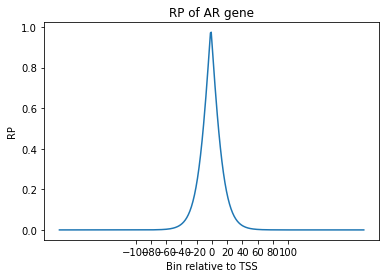

In [14]:
def get_RP_profile(rp_map, rp_map_symbols, tss_bin, symbol, bin_flanks = 100):
    
    symbol_column = np.argwhere(rp_map_symbols == symbol)[0][0]
    
    bin_range = range(tss_bin - bin_flanks, tss_bin + bin_flanks)
    
    return np.array(bin_range) - tss_bin, np.squeeze(np.array(rp_map[bin_range, symbol_column].todense()))

x,y = get_RP_profile(rp_map.tocsc(), rp_map_symbols, 1458898, 'AR', 200)

ax = sns.lineplot(x,y)
ax.set(xticks = range(-100, 101, 20), xlabel = 'Bin relative to TSS', ylabel = 'RP', title = 'RP of AR gene')

In [40]:
config = configparser.ConfigParser()
config.read('lisa_config.ini')

['lisa_config.ini']

In [43]:
import LISA

lisa = LISA.LISA('hg38', num_background_genes=1000, num_datasets_selected = 10)


___________________________________________________________________________________________________________________________

Lisa: inferring transcriptional regulators through integrative modeling of public chromatin accessibility and ChIP-seq data
https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1934-6
X. Shirley Liu Lab, 2020
___________________________________________________________________________________________________________________________



In [49]:
_config = configparser.ConfigParser()
_config.read('lisa_config.ini')

['lisa_config.ini']

In [53]:
with h5.File('data/hg38/lisa_data_hg38.h5', 'r') as data_object:
    rp_map_symbols = data_object[_config.get('regulatory_potential_bin_map', 'gene_symbols')][...].astype(str)
    rp_map_bins = data_object[_config.get('regulatory_potential_bin_map', 'bins')][...].astype(np.int64)
    rp_map_symbol_index = data_object[_config.get('regulatory_potential_bin_map', 'symbol_index')][...].astype(np.int64)
    rp_map_values = data_object[_config.get('regulatory_potential_bin_map', 'RP')][...].astype(np.int64)

    rp_map = sparse.coo_matrix(
        (rp_map_values,
        (rp_map_bins, rp_map_symbol_index)
        ),
        shape = (int(_config.get('lisa_params','num_bins')), rp_map_symbol_index.max() + 1)
    )

In [54]:
rp_map

<3209513x19105 sparse matrix of type '<class 'numpy.int64'>'
	with 3819965 stored elements in COOrdinate format>

[Text(0, 0.5, 'RP'),
 Text(0.5, 0, 'Bin relative to TSS'),
 Text(0.5, 1.0, 'RP of AR gene')]

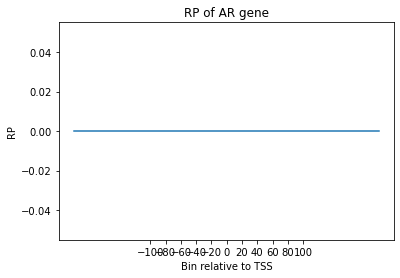

In [56]:
x,y = get_RP_profile(rp_map.tocsc(), rp_map_symbols, 1458898, 'AR', 200)

ax = sns.lineplot(x,y)
ax.set(xticks = range(-100, 101, 20), xlabel = 'Bin relative to TSS', ylabel = 'RP', title = 'RP of AR gene')

# Working on RP map

In [53]:
data.close()

In [345]:
_config = configparser.ConfigParser()

_config.read('lisa_config.ini')

['lisa_config.ini']

In [346]:
with h5.File(_config.get('paths','h5_path').format(species = 'hg38'), 'r') as data:
    rp_map_symbols = data[_config.get('regulatory_potential_bin_map', 'gene_symbols')][...].astype(str)
    rp_map_bins = data[_config.get('regulatory_potential_bin_map', 'bins')][...].astype(np.int64)
    rp_map_symbol_index = data[_config.get('regulatory_potential_bin_map', 'symbol_index')][...].astype(np.int64)
    rp_map_distances = data[_config.get('regulatory_potential_bin_map', 'distances')][...].astype(np.int64)

rp_map = sparse.csc_matrix(
    (rp_map_distances,
     (rp_map_bins, rp_map_symbol_index)
    ),
    shape = (int(_config.get('lisa_params','num_bins')), rp_map_symbol_index.max() + 1)
)

with h5.File(_config.get('paths','h5_path').format(species = 'hg38'), 'r') as data:
    genelist = np.random.choice(data[_config.get('gene_info','gene_symbols')][...].astype(str), 3090)

rp_map_symbols_map = dict(zip(rp_map_symbols, range(len(rp_map_symbols))))

rp_map_symbols_idx = np.array([rp_map_symbols_map[symbol] for symbol in genelist])

rp_map[:, rp_map_symbols_idx][:,10]

# ChIP-seq model

In [21]:
data = h5.File('./data/lisa_data_hg38_v2', 'r')

In [27]:
data.close()

In [ ]:
rp_map, rp_map_symbols = build_rp_map(lisa.gene_symbols, )

# ISD method testing

In [ ]:
import h5py as h5
import numpy as np

data = h5.File('./data/hg38/lisa_data_hg38.h5', 'r')

chip_list = []

for key in data['ChIP-seq_1000kb'].keys():
    chip_list.append(data['ChIP-seq_1000kb'][key][...].astype(np.int64))

profile = data['DNase']['binned_reads']['41040'][...]

profile = np.repeat(profile[:,np.newaxis], 10, axis = 1)

data.close()

from scipy import sparse

rp_shape = (3209513, 3090)

num_datapoints = 1e7

random_gene = np.random.choice(rp_shape[1], int(num_datapoints))
random_bin = np.random.choice(rp_shape[0], int(num_datapoints))

rp_map = sparse.csc_matrix(
    (
        np.ones(int(num_datapoints)),
        (random_bin, random_gene)
    ),
    shape = rp_shape
).transpose()

from multiprocessing import Pool

num_cores = multiprocessing.cpu_count()

def purturb_dataset(args):
    
    profile, bin_num, chip_id, rp_map = args
    
    bin_by_chip = sparse.csc_matrix(
        (
            profile,
            (bin_num, chip_id)
        ),
        shape = (3209513, chip_id[-1] + 1)
    )

    return rp_map.dot(bin_by_chip)

class Purturber:
    
    def __init__(self, chromatin_profiles, peaks, peak_dataset_ids, rp_map):
        
        self.chromatin_profiles = chromatin_profiles
        self.peaks = peaks
        self.peak_ids = peak_dataset_ids
        self.rp_map = rp_map
        
        
    def __iter__(self):
        
        try:
            self.peak_reads
        except AttributeError:
            self.peak_reads = self.chromatin_profiles[self.peaks]
        
        for reads in self.peak_reads.T:
            yield reads, self.peaks, self.peak_ids, self.rp_map

#prep ahead

chip_samples = chip_list[:4000]

flat_chip = np.concatenate(chip_samples)

chip_id = np.concatenate([np.full(len(chip), i) for i, chip in enumerate(chip_samples)])

test = Purturber(profile, flat_chip, chip_id, rp_map)

%%timeit
with Pool(min(num_cores - 1 or 1, 10)) as p:
    dataset_knockouts = p.map(purturb_dataset, test)

# Multiplication Method

importlib.reload(insilico_deletion_model)

from insilico_deletion_model import get_delta_RP

factor_binding = sparse.csc_matrix(
    (
        np.ones(len(flat_chip)),
        (flat_chip, chip_id)
    ),
    shape = (3209513, len(chip_list))
)

get_delta_RP(profile[:,0], factor_binding, rp_map)

%%timeit

knockouts = [
        get_delta_RP(_profile, factor_binding, rp_map)
        for _profile in profile.T
    ]

datacube = np.concatenate(knockouts, axis = 2)

# np.where method

!ls data

# Selection Model Testing

In [5]:
import importlib

In [7]:
import models

In [169]:
def make_random_labels(num_samples, num_pos):
    label = np.zeros(num_samples)
    label[np.random.choice(total, num_pos, replace = False)] = 1
    label = label.astype(np.bool)
    return label

dataset_label = make_random_labels(1000, 40)
gene_label = make_random_labels(3000, 100)

In [170]:
matrix_shape = (gene_label.size, dataset_label.size)

design_matrix = gene_label[:,np.newaxis] * dataset_label[np.newaxis, :]

dataset_directionality = np.random.choice([-0.4,1.0], (1, matrix_shape[1])) # ~B(1/2)
signal = dataset_directionality * (np.random.normal(0,1, matrix_shape) + np.random.lognormal(0, 0.25, matrix_shape)) # ~ N(lognormal(0,0.5), 1)
background = np.random.normal(0, 1, matrix_shape) # ~N(0,1)

rp_matrix =  background + design_matrix * signal
rp_matrix = rp_matrix - rp_matrix.min()

In [171]:
selector = models.LR_BinarySearch_SampleSelectionModel(200, 10)

selections = selector.fit(rp_matrix, gene_label)

In [172]:
query, background = rp_matrix[:, selections][gene_label], rp_matrix[:, selections][~gene_label]

In [173]:
l = list(zip(query.T, background.T))

In [174]:
vals = []
for i, dataset in enumerate(l):
    for q in dataset[0]:
        vals.append((i, True, q))
    for b in dataset[1]:
        vals.append((i, False, b))

In [175]:
data = pd.DataFrame(vals, columns = ['Dataset','Query Gene','RP'])

Text(0.5, 0, '')

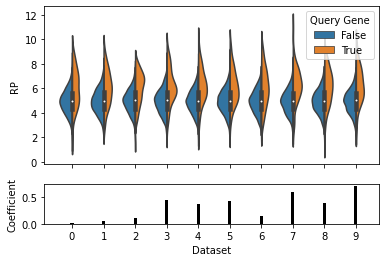

In [176]:
grid_spec = dict(width_ratios = [1], height_ratios= [4,1])
fig, axes = plt.subplots(2,1, sharex = True, gridspec_kw=grid_spec)

sns.violinplot(data = data, x = 'Dataset', hue = 'Query Gene', y = 'RP', split = True, ax = axes[0])

axes[1].bar(np.arange(10),selector.model.coef_[np.abs(selector.model.coef_) > 1e-7], width = 0.1, color = 'black')

axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Coefficient')
axes[0].set_xlabel('')

In [ ]:
rp_matrix[:, selections].shape

In [141]:
models = importlib.reload(models)

chromatin_model = models.LR_ChromatinModel({'C' : list(10.0**np.arange(-4,4,0.5))})

chromatin_model.fit(rp_matrix[:, selections], gene_label)

chromatin_model.get_deltaRP_activation(np.zeros((3000, 10, 500)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Testing gene symbology

In [7]:
data = h5.File('./old_data/hg38/cluster_human/DNase_median_for_each_cluster.h5', 'r')

In [10]:
data['RefSeq'][...]

array([b'chr1:11873:11874:NR_046018:DDX11L1',
       b'chr1:17436:17437:NR_107063:MIR6859-3',
       b'chr1:17436:17437:NR_128720:MIR6859-4', ...,
       b'chrY:57184100:57184101:NM_176786:IL9R',
       b'chrY:57184100:57184101:NM_002186:IL9R',
       b'chrY:57214703:57214704:NR_110561:DDX11L16'], dtype='|S200')

In [13]:
with open('masterlist.txt', 'w') as f:
    f.write('\n'.join(data['RefSeq'][...].astype(str)))

In [14]:
!head masterlist.txt

chr1:11873:11874:NR_046018:DDX11L1
chr1:17436:17437:NR_107063:MIR6859-3
chr1:17436:17437:NR_128720:MIR6859-4
chr1:17436:17437:NR_106918:MIR6859-1
chr1:17436:17437:NR_107062:MIR6859-2
chr1:29370:29371:NR_024540:WASH7P
chr1:30365:30366:NR_036267:MIR1302-10
chr1:30365:30366:NR_036266:MIR1302-9
chr1:30365:30366:NR_036268:MIR1302-11
chr1:30365:30366:NR_036051:MIR1302-2


In [15]:
from collections import Counter

In [16]:
masterlist = !cat masterlist.txt

In [27]:
symbols = [l for l in masterlist]

Counter(symbols).most_common()

[('chr1:11873:11874:NR_046018:DDX11L1', 1),
 ('chr1:17436:17437:NR_107063:MIR6859-3', 1),
 ('chr1:17436:17437:NR_128720:MIR6859-4', 1),
 ('chr1:17436:17437:NR_106918:MIR6859-1', 1),
 ('chr1:17436:17437:NR_107062:MIR6859-2', 1),
 ('chr1:29370:29371:NR_024540:WASH7P', 1),
 ('chr1:30365:30366:NR_036267:MIR1302-10', 1),
 ('chr1:30365:30366:NR_036266:MIR1302-9', 1),
 ('chr1:30365:30366:NR_036268:MIR1302-11', 1),
 ('chr1:30365:30366:NR_036051:MIR1302-2', 1),
 ('chr1:36081:36082:NR_026822:FAM138C', 1),
 ('chr1:36081:36082:NR_026820:FAM138F', 1),
 ('chr1:36081:36082:NR_026818:FAM138A', 1),
 ('chr1:69090:69091:NM_001005484:OR4F5', 1),
 ('chr1:140566:140567:NR_039983:LOC729737', 1),
 ('chr1:187958:187959:NR_107063:MIR6859-3', 1),
 ('chr1:187958:187959:NR_128720:MIR6859-4', 1),
 ('chr1:187958:187959:NR_106918:MIR6859-1', 1),
 ('chr1:187958:187959:NR_107062:MIR6859-2', 1),
 ('chr1:206597:206598:NR_026823:FAM138D', 1),
 ('chr1:451678:451679:NM_001005224:OR4F3', 1),
 ('chr1:451678:451679:NM_00100522

In [29]:
gene_ids = pd.read_csv('masterlist.txt', sep = ':', header = None)

In [31]:
gene_ids.columns = ['chr','start','end','id','symbol']

In [33]:
gene_ids.groupby('symbol').nunique()

,chr,start,end,id,symbol
symbol,,,,,
A1BG,1,1,1,1,1
A1BG-AS1,1,1,1,1,1
A1CF,1,1,1,6,1
A2M,1,1,1,1,1
A2M-AS1,1,1,1,1,1
...,...,...,...,...,...
ZYG11A,1,1,1,2,1
ZYG11B,1,1,1,1,1
ZYX,1,1,1,2,1


In [38]:
tad_data = pd.read_csv('old_data/hg38/hg38_promoter_TADann_H3K4me3_enhance_k27me3_Using.xls', encoding='latin',sep ='\t')

In [45]:
len(set(tad_data.geneName).intersection([l.split(':')[-1] for l in masterlist])), len(tad_data)

(19105, 19866)

# Newer, better RP

In [1]:
!ls old_data/hg38/

cistrome.txt
cluster_human
ER.profile
ER.Snakefile.model
ER.yml
hg38_100to1000window.out.npy
hg38_beta_peak5fold.h5
hg38.genome
hg38_promoter_TADann_H3K4me3_enhance_k27me3_Using.xls
hg38.tss
hg38_window1kb.bed
hg38_window1kb_DNase.h5
hg38_window1kb_H3K27ac.h5
hg38_window1kb_tss.bed
hs_tf_new_beta_rp.h5
hs_tf_new_peak_loct.h5
lisa_meta.xls
lisa_meta.xls.all
lisa_meta.xls.all.forR
lisa_v2_data.h5
lisa_v2_hg38.h5
marge2_motif_100bp_99.h5
margeRP_DNase.h5
margeRP_H3K27ac.h5


In [4]:
bin_regions = pd.read_csv('old_data/hg38/hg38_window1kb.bed', sep = '\t', header = None)

In [104]:
bin_regions

,0,1,2,3
0,chr1,0,1000,1
1,chr1,1000,2000,2
2,chr1,2000,3000,3
3,chr1,3000,4000,4
4,chr1,4000,5000,5
...,...,...,...,...
3209508,chrUn_KI270539v1,0,993,3209509
3209509,chrUn_KI270385v1,0,990,3209510
3209510,chrUn_KI270423v1,0,981,3209511
3209511,chrUn_KI270392v1,0,971,3209512


In [156]:
bins = bin_regions[bin_regions[0] == 'chr1'][1].values
bin_index = bin_regions[bin_regions[0] == 'chr1'][3].values - 1

tss = 200001

min_bin, split_bin, max_bin = np.digitize([tss - 1e5, tss, tss + 1e5], bins)

bin_indices = bin_index[min_bin: max_bin - 1]

bins = np.concatenate([bins[min_bin: split_bin], [tss], bins[split_bin: max_bin]])

split_bin -= min_bin

tss_bins = (split_bin - 1, split_bin)

left_bins = np.abs(np.array(list(zip(bins[1:tss_bins[1] + 1], bins[:tss_bins[0] + 1]))) - tss)

right_bins = np.abs(np.array(list(zip(bins[tss_bins[1]:-1], bins[tss_bins[1] + 1:]))) - tss)

intervals = np.concatenate([left_bins, right_bins], axis = 0)

RP = intervals * (-np.log(1/3) / 10000.0)

RP = 2 * ( RP - np.log(np.exp(RP) + 1))

RP = np.subtract(RP[:,1], RP[:,0])

summed_tss_rp = RP[list(tss_bins)].sum()

RP[tss_bins[0]] = summed_tss_rp

RP = np.delete(RP, tss_bins[1])

RP = RP / RP.max()

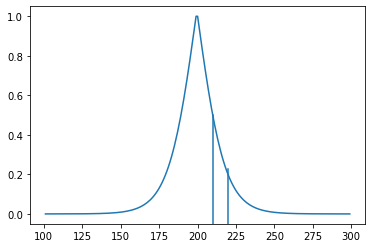

In [157]:
ax = sns.lineplot(y = RP / RP.max(), x = bin_indices)
ax.axvline(210, 0, 0.5)
ax.axvline(220, 0, 0.25)

In [112]:
bins

array([     0,   1000,   2000,   3000,   4000,   4500,   5000,   6000,
         7000,   8000,   9000,  10000,  11000,  12000,  13000,  14000,
        15000,  16000,  17000,  18000,  19000,  20000,  21000,  22000,
        23000,  24000,  25000,  26000,  27000,  28000,  29000,  30000,
        31000,  32000,  33000,  34000,  35000,  36000,  37000,  38000,
        39000,  40000,  41000,  42000,  43000,  44000,  45000,  46000,
        47000,  48000,  49000,  50000,  51000,  52000,  53000,  54000,
        55000,  56000,  57000,  58000,  59000,  60000,  61000,  62000,
        63000,  64000,  65000,  66000,  67000,  68000,  69000,  70000,
        71000,  72000,  73000,  74000,  75000,  76000,  77000,  78000,
        79000,  80000,  81000,  82000,  83000,  84000,  85000,  86000,
        87000,  88000,  89000,  90000,  91000,  92000,  93000,  94000,
        95000,  96000,  97000,  98000,  99000, 100000, 101000, 102000,
       103000, 104000])

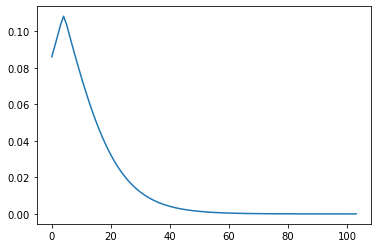

In [109]:
sns.lineplot(data = RP)

In [107]:
bin_indices.shape, RP.shape

((105,), (104,))

In [108]:
bin_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104])

In [158]:
!head old_data/hg38/hg38_promoter_TADann_H3K4me3_enhance_k27me3_Using.xls

chrom	pstart	pend	geneID	geneName	strand	TADchrom	TADstart	TADend	TADid	median_zk4me3_enhance	median_TADk27ac	k4me3_cluster	tad_cluster	k4me3_order_cluster	tad_order_cluster	median_zk27me3_enhance	k27me3_cluster	k27me3_order_cluster	quadrant
chr1	68091	70091	NM_001005484.1	OR4F5	+	chr1	0	834757	interTAD0	-1.0654118990905144	-0.9936363	0	2	1	1	-1.0046318349174779	4	1	Third
chr1	180049	182049	XM_011543808.2	LOC102725121	+	chr1	0	834757	interTAD0	-1.0238659479554018	-0.9936363	0	2	1	1	-0.9573434877993728	4	1	Third
chr1	924741	926741	NM_152486.2	SAMD11	+	chr1	834757	1314757	TAD1	-0.8447498934167248	0.7478953729319631	7	5	3	8	1.3106846781547017	2	10	second
chr1	959103	961103	XM_006710600.3	KLHL17	+	chr1	834757	1314757	TAD1	0.7779220898184043	0.7478953729319631	1	5	8	8	0.5200804445294804	0	6	first
chr1	964820	966820	XM_011542248.2	PLEKHN1	+	chr1	834757	1314757	TAD1	-0.7734435053026837	0.7478953729319631	7	5	3	8	0.2954342388656861	0	6	second
chr1	1012467	1014467	NM_005101.3	ISG15	+	chr1	83475